### Importing Libraries

In [50]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Dataset Overview

### Ads Dataset

#### Loading the Dataset

In [16]:
ads_df = pd.read_csv(os.path.join('datasets', 'dataset_1.csv'), index_col=0)

# Displaying the first few rows to understand the structure of the data
ads_df.head(3)

,url,Featured,Vehicle,Location,Model,Vehicle Type,Mileage,Engine Type,Transmission,Features,Details,Price,Seller Details,Seller's Comments
Ad Ref,,,,,,,,,,,,,,
9307635,https://www.pakwheels.com/used-cars/mg-hs-2021...,1,MG HS Trophy 2021,"Bahria Town, Lahore Punjab",2021,Crossover,"31,500 km",Petrol,Automatic,"['ABS', 'AM/FM Radio', 'Air Bags', 'Air Condit...","{'Registered In': 'Punjab', 'Color': 'Pearl Wh...",PKR 66.5 lacs,"Syed Naqvi \nMember Since Oct 22, 2020",MG Hs 2021 model registered in 2022 Imported U...
9233999,https://www.pakwheels.com/used-cars/bmw-x1-201...,0,BMW X1 sDrive18i 2017,"Central Park Housing Scheme, Lahore Punjab",2017,Crossover,"70,000 km",Petrol,Automatic,"['ABS', 'AM/FM Radio', 'Air Bags', 'Air Condit...","{'Registered In': 'Islamabad', 'Color': 'Alpin...","PKR 68 lacs\n\nFinancing starts at PKR 98,662/...","M Adeel Jutt\nMember Since Apr 05, 2021",totally genuine low mileage all original docum...
9259914,https://www.pakwheels.com/used-cars/toyota-lan...,1,Toyota Land Cruiser ZX 2022,Islamabad Islamabad,2022,SUV,30 km,Petrol,Automatic,"['ABS', 'AM/FM Radio', 'Air Bags', 'Air Condit...","{'Registered In': 'Un-Registered', 'Color': 'W...",PKR 7.35 crore,Dealer:\nAamir Shah,"LC 300 , Toyota Land Cruiser. Full house zer..."


#### Display basic information about the dataset

In [24]:
ads_df.dtypes

url                  object
Featured              int64
Vehicle              object
Location             object
Model                 int64
Vehicle Type         object
Mileage              object
Engine Type          object
Transmission         object
Features             object
Details              object
Price                object
Seller Details       object
Seller's Comments    object
dtype: object

#### Check for missing values

In [18]:
ads_df.isnull().sum()

url                  0
Featured             0
Vehicle              0
Location             0
Model                0
Vehicle Type         0
Mileage              0
Engine Type          0
Transmission         0
Features             0
Details              0
Price                0
Seller Details       0
Seller's Comments    0
dtype: int64

#### Summary statistics of numerical columns

In [19]:
ads_df.describe()

,Featured,Model
count,53784.000000,53784.000000
mean,0.161163,2013.583166
std,0.367685,7.665484
min,0.000000,1951.000000
25%,0.000000,2009.000000
50%,0.000000,2015.000000
75%,0.000000,2020.000000
max,1.000000,2024.000000


#### Check unique values for each column

In [25]:
for column in ads_df.columns:
    print(f"{column}: {ads_df[column].nunique()} unique values")

url: 53784 unique values
Featured: 2 unique values
Vehicle: 6010 unique values
Location: 2237 unique values
Model: 60 unique values
Vehicle Type: 22 unique values
Mileage: 7955 unique values
Engine Type: 6 unique values
Transmission: 2 unique values
Features: 4020 unique values
Details: 32355 unique values
Price: 4487 unique values
Seller Details: 44733 unique values
Seller's Comments: 51685 unique values


In [40]:
ads_df['Engine Type'].value_counts()

Engine Type
Petrol      46804
Hybrid       4574
Diesel       1577
CNG           422
Electric      339
LPG            68
Name: count, dtype: int64

#### EDA on key columns

**a. Vehicle Type Distribution**

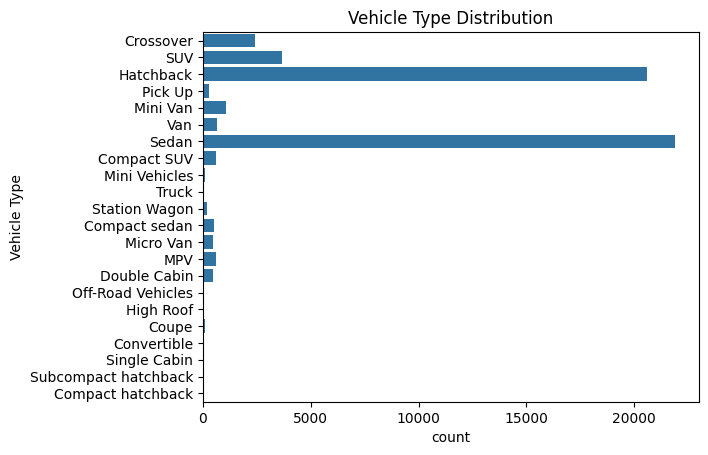

In [26]:
sns.countplot(y=ads_df['Vehicle Type'])
plt.title('Vehicle Type Distribution')
plt.show()

**b. Transmission Distribution**

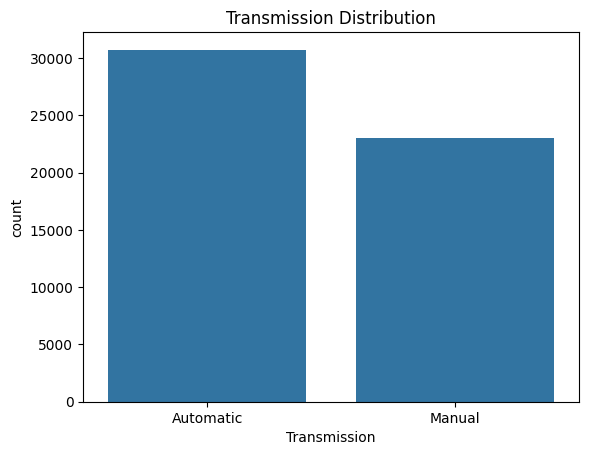

In [32]:
sns.countplot(x=ads_df['Transmission'])
plt.title('Transmission Distribution')
plt.show()

**c. Engine Type Distribution**

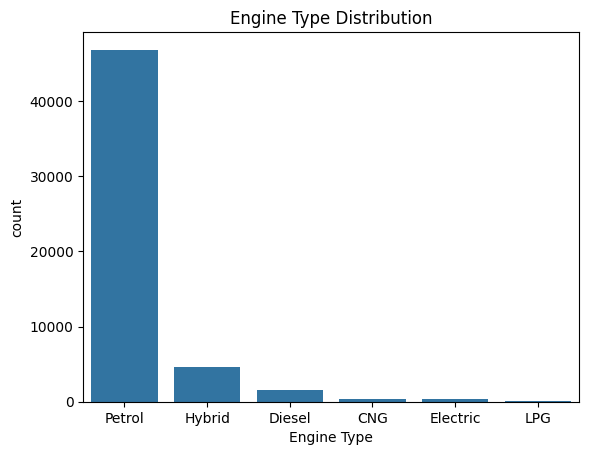

In [43]:
sns.countplot(x=ads_df['Engine Type'])
plt.title('Engine Type Distribution')
plt.show()

In [48]:
ads_df['Mileage'].astype(str).str.replace(r'km|,', '', regex=True).astype(int)

Ad Ref
9307635     31500
9233999     70000
9259914        30
9241391    100000
9238264         1
            ...  
8962667     93000
9265302     61000
9266237    396660
9266018    150000
9251081     12345
Name: Mileage, Length: 53784, dtype: int64

**d. Distribution of Mileage**

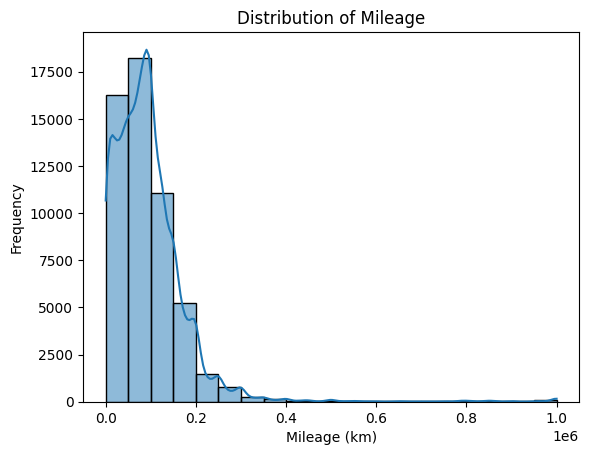

In [49]:
sns.histplot(ads_df['Mileage'].astype(str).str.replace(r'km|,', '', regex=True).astype(int), kde=True, bins=20)
plt.title('Distribution of Mileage')
plt.xlabel('Mileage (km)')
plt.ylabel('Frequency')
plt.show()

**e. Correlation between numerical features**

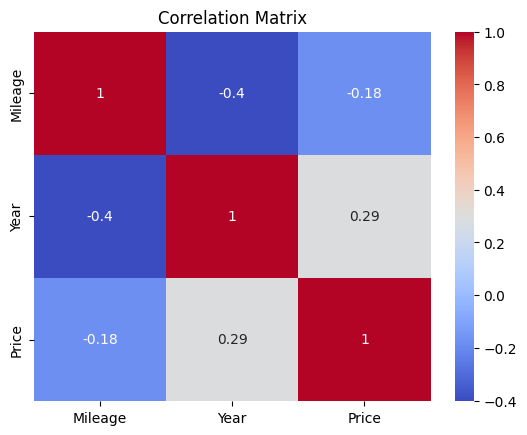

In [116]:
units = ads_df['Price'].str.split('\n').str[0].str.replace('PKR', '').str.split(' ').str[-1]
value = ads_df['Price'].str.split('\n').str[0].str.replace('PKR', '').str.strip().str.split(' ').str[0]

data = pd.DataFrame({
    'Year': ads_df.loc[units != 'price', 'Model'],
    'Price': value[units != 'price'].astype(float) * units[units != 'price'].apply(lambda x: 10**5 if 'lacs' in x else 10**7 if 'crore' in x else x),
    'Mileage': ads_df.loc[units != 'price', 'Mileage'].astype(str).str.replace(r'km|,', '', regex=True).astype(int)
})

numerical_cols = ['Mileage', 'Year', 'Price']  
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

#### Feature Cleaning and Transformation

#####  **a. Convert Mileage to numeric (removing "km")**

In [117]:
ads_df['Mileage'] = ads_df['Mileage'].astype(str).str.replace(r'km|,', '', regex=True).astype(int)

##### **b. Extract year from Model (assuming it's a year)**

In [ ]:
ads_df['Model'] = data['Model'].astype(int)

##### **c. Convert Price to numeric (removing "lacs, crore")**

*Removing Entries with 'Call for Price'*

In [ ]:
units = ads_df['Price'].str.split('\n').str[0].str.replace('PKR', '').str.split(' ').str[-1]
value = ads_df['Price'].str.split('\n').str[0].str.replace('PKR', '').str.strip().str.split(' ').str[0]

ads_df = ads_df[units != 'price']

print(f"Number of rows after removal: {ads_df.shape[0]}")

Number of rows after removal: 53194


In [124]:
ads_df['Price'] = value[units != 'price'].astype(float) * units[units != 'price'].apply(lambda x: 10**5 if 'lacs' in x else 10**7 if 'crore' in x else x)

*Displaying statistics to verify*

In [126]:
ads_df.describe()

,Featured,Model,Mileage,Price
count,53194.000000,53194.000000,53194.000000,5.319400e+04
mean,0.154266,2013.514682,95730.678911,4.182650e+06
std,0.361206,7.670105,87612.496904,6.301684e+06
min,0.000000,1951.000000,1.000000,1.250000e+05
25%,0.000000,2009.000000,42224.750000,1.650000e+06
50%,0.000000,2015.000000,85000.000000,2.890000e+06
75%,0.000000,2020.000000,125000.000000,4.550000e+06
max,1.000000,2024.000000,1000000.000000,3.375000e+08
